WD: data/2021-11-11/Debugging/
AlreadyDir
-----------
Initializing structure...
time for choose_chunkdivision = 0.000271082 s
Working in 2D dimensions.
Computational cell is 40 x 40 x 0 with resolution 4
     cylinder, center = (0,0,0)
          radius 62.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 4.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
time for set_epsilon = 0.0226748 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,0,0.932258) = 0.646486 after 81 iters
MPB solved for frequency_1(0,0,0.930343) = 0.645161 after 25 iters
MPB solved for frequency_1(0,0,0.930343) = 0.645161 after 1 iters
Meep: using output directory 'data/2021-11-11/Debugging/'


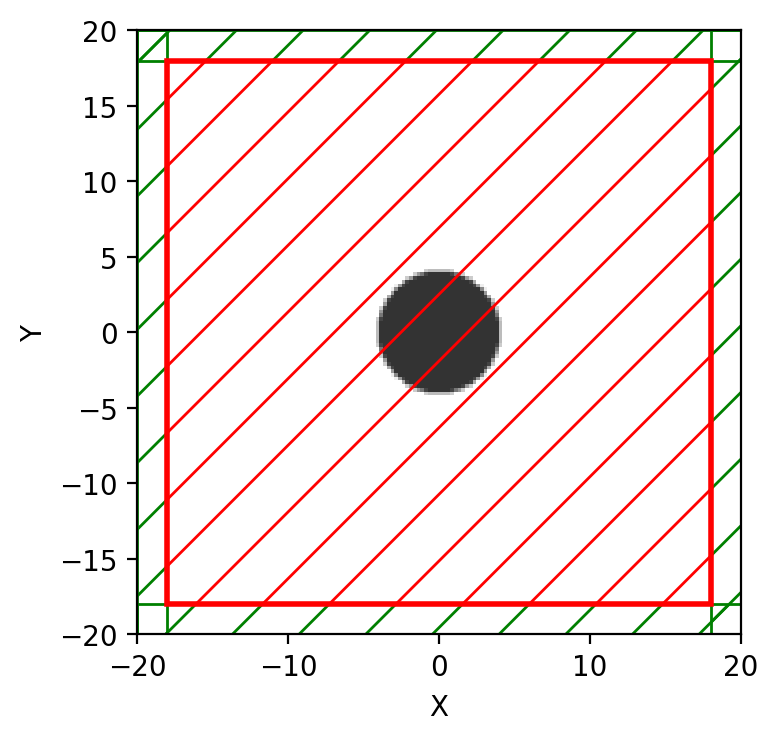

FloatProgress(value=0.0, description='0% done ', max=300.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.6536202351224388, 4.018488695719272e-06, -81326.62359094268, 5.33013412830122, 5.216423814439375-1.0951038370086916i, 1.4996748318536647e-08+0.0i
harminv0:, 0.6584551059265269, -7.967112733989887e-05, 4132.332049961945, 0.00949012106517161, 0.006214705834551894+0.0071721565251743205i, 7.536387409233495e-06+0.0i
run 0 finished at t = 300.0 (2400 timesteps)


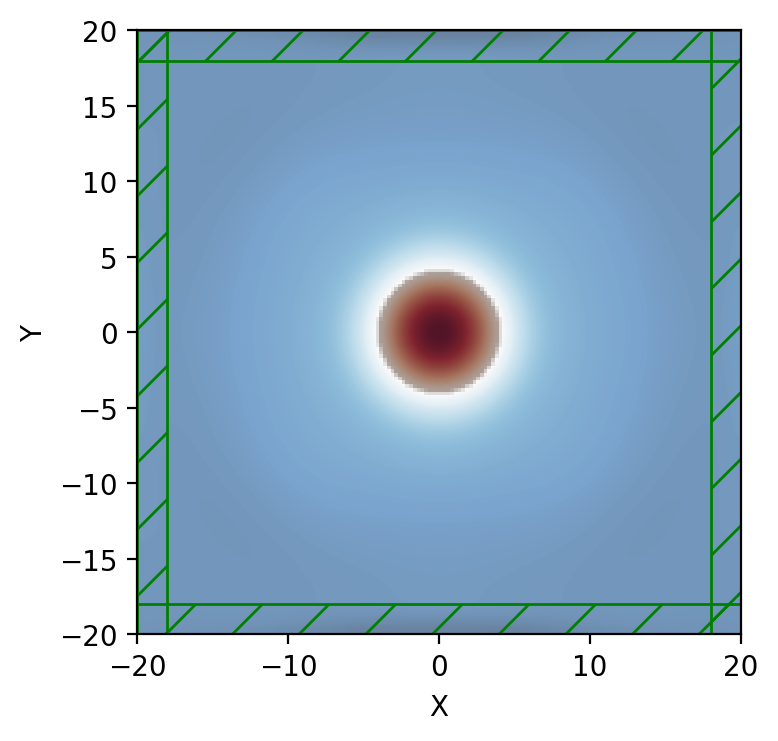

In [3]:
import Model as M
import time as time
import numpy as np

Model = M.Model()

Model.df     = 5e-2
Model.res = 4
Model.filename = 'Debugging'
Model.Notes    = 'Trying to get Bloch BC working'
Model.SimSize  = 40


Model.Pad = 0       #Cladding left over from polishing


Model.buildFibre()
#Model.buildPolishedFibre(WPDMS=True)

Model.BuildModel(Plot=True) 

#Model.GetEigenModes() #also sets sources up at the fundamental mode

Model.SimT = 100  #setSimtime in fs
#Model.RunAndPlotF()

#Model.RunKpoints()
Model.RunHarmv()

In [23]:
print("Given K point: ", Model.kpoint)

Model.harm.modes[0]

Given K point:  Vector3<0.0, 0.0, 0.932258064516129>


Mode(freq=0.6536202351224388, decay=4.018488695719272e-06, Q=-81326.62359094268, amp=(5.216423814439375-1.0951038370086916j), err=(1.4996748318536647e-08+0j))